# Netflix Data: Cleaning, Analysis and Visualization.

In [2]:
# Load data
import pandas as pd
import numpy as np

netflix_data= pd.read_csv(r"E:\Netflix Data Cleaning, Analysis and Visualization\netflix1.csv", encoding="utf-8")

netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Quick shape + column check:
print(netflix_data.shape)
print(netflix_data.columns.tolist())

# Peek 
netflix_data.sample(5, random_state=42)

(8790, 10)
['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3942,s5505,Movie,Kiss & Cry,Sean Cisterna,Canada,05-01-2017,2017,TV-MA,93 min,"Dramas, International Movies, Romantic Movies"
8360,s6264,TV Show,Beating Again,Not Given,South Korea,5/22/2017,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."
221,s1463,TV Show,Running Man,Not Given,Pakistan,01-01-2021,2020,TV-Y7,1 Season,"Kids' TV, TV Comedies"
4883,s6741,Movie,Farce,Shadi Ali,Egypt,06-06-2019,2017,TV-MA,94 min,"Comedies, International Movies"
2210,s2758,Movie,Pretty Little Stalker,Sam Irvin,United States,3/31/2020,2018,TV-14,84 min,Thrillers


In [4]:
print(netflix_data.isnull().sum())
print("\n Duplicate values: ", netflix_data.duplicated().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

 Duplicate values:  0


In [5]:
# 1) Standardize column names (strip spaces, lower snake_case) 
netflix_data.columns = (netflix_data.columns .str.strip() .str.lower() .str.replace(" ", "_") )

# 2) Clean 'type' and 'rating' 
netflix_data["type"] = netflix_data["type"].str.strip().str.title() 
netflix_data["rating"] = netflix_data["rating"].str.strip().str.upper()

# 3) Convert date_added and extract parts 
netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"], errors="coerce") 
netflix_data["year_added"] = netflix_data["date_added"].dt.year.astype("Int64")
netflix_data["month_added"] = netflix_data["date_added"].dt.month.astype("Int64")
netflix_data["day_added"] = netflix_data["date_added"].dt.day.astype("Int64")

# 4) Standardize country:
netflix_data["country"] = netflix_data["country"].str.strip()

# 5) Duration parsing:
def extract_movie_minutes(row):
    if row["type"] == "Movie" and pd.notna(row["duration"]):
        return int(row["duration"].replace("min", "").strip())
    return np.nan
def extract_tv_seasons(row):
    if row["type"] == "Tv Show" and pd.notna(row["duration"]):
        return int(row["duration"].split()[0])
    return np.nan

netflix_data["movie_duration_min"] = netflix_data.apply(extract_movie_minutes, axis=1)
netflix_data["tv_seasons"] = netflix_data.apply(extract_tv_seasons, axis=1)

netflix_data["movie_duration_min"] = netflix_data["movie_duration_min"].astype("Int64")
netflix_data["tv_seasons"] = netflix_data["tv_seasons"].astype("Int64")

# 7) Genres: clean list and explode later for analysis 
netflix_data["listed_in"] = netflix_data["listed_in"].fillna("").str.strip() 
netflix_data["genres_list"] = netflix_data["listed_in"].str.split(",").apply(lambda xs: [x.strip() for x in xs])

# 8) Director: fill empties for grouping without losing rows 
netflix_data["director"] = netflix_data["director"].replace("", np.nan).fillna("Not Given")

# 9) Keep only relevant timeframe if needed (2008–2021 in this dataset) 
netflix_data_clean = netflix_data.copy() 
print(netflix_data_clean.info())
netflix_data_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             8790 non-null   object        
 1   type                8790 non-null   object        
 2   title               8790 non-null   object        
 3   director            8790 non-null   object        
 4   country             8790 non-null   object        
 5   date_added          4404 non-null   datetime64[ns]
 6   release_year        8790 non-null   int64         
 7   rating              8790 non-null   object        
 8   duration            8790 non-null   object        
 9   listed_in           8790 non-null   object        
 10  year_added          4404 non-null   Int64         
 11  month_added         4404 non-null   Int64         
 12  day_added           4404 non-null   Int64         
 13  movie_duration_min  6126 non-null   Int64       

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,movie_duration_min,tv_seasons,genres_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,90,<NA>,[Documentaries]
1,s3,Tv Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,<NA>,1,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,Tv Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,<NA>,1,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,91,<NA>,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,125,<NA>,"[Dramas, Independent Movies, International Mov..."


In [6]:
# Shortest Movie:
shortest_movie= netflix_data_clean.loc[netflix_data_clean['movie_duration_min']==np.min(netflix_data_clean.movie_duration_min)]
shortest_movie

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,movie_duration_min,tv_seasons,genres_list
2820,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",United States,NaT,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy",<NA>,<NA>,<NA>,3,<NA>,"[Children & Family Movies, Sci-Fi & Fantasy]"


In [7]:
# Longest Movie:
longest_movie= netflix_data_clean.loc[netflix_data_clean['movie_duration_min']==np.max(netflix_data_clean.movie_duration_min)]
longest_movie

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,movie_duration_min,tv_seasons,genres_list
7822,s4254,Movie,Black Mirror: Bandersnatch,Not Given,United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy",2018,12,28,312,<NA>,"[Dramas, International Movies, Sci-Fi & Fantasy]"


In [8]:
# Tv_show seasons count:
netflix_data_clean['tv_seasons'].value_counts()

tv_seasons
1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
15       2
13       2
12       2
17       1
11       1
Name: count, dtype: Int64

In [9]:
# Tv_shows with highest no. of seasons:
Longest_Tv_show= netflix_data_clean.loc[(netflix_data_clean['tv_seasons']>=13)]
Longest_Tv_show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,movie_duration_min,tv_seasons,genres_list
1971,s2424,Tv Show,Supernatural,Phil Sgriccia,United States,NaT,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...",<NA>,<NA>,<NA>,<NA>,15,"[Classic & Cult TV, TV Action & Adventure, TV ..."
6697,s549,Tv Show,Grey's Anatomy,Not Given,United States,NaT,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",<NA>,<NA>,<NA>,<NA>,17,"[Romantic TV Shows, TV Dramas]"
6884,s1355,Tv Show,Heartland,Not Given,Canada,NaT,2019,TV-14,13 Seasons,TV Dramas,<NA>,<NA>,<NA>,<NA>,13,[TV Dramas]
7816,s4221,Tv Show,COMEDIANS of the world,Not Given,United States,NaT,2019,TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",<NA>,<NA>,<NA>,<NA>,13,"[Stand-Up Comedy & Talk Shows, TV Comedies]"
7987,s4799,Tv Show,NCIS,Not Given,United States,NaT,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",<NA>,<NA>,<NA>,<NA>,15,"[Crime TV Shows, TV Dramas, TV Mysteries]"


In [10]:
Longest_Tv_show['rating'].value_counts()

rating
TV-14    4
TV-MA    1
Name: count, dtype: int64

## EDA & Visualizations:

C:\Users\hp\AppData\Local\Temp\ipykernel_12272\3711276031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=netflix_data_clean, x="type", palette=["#4c78a8","#f58518"])


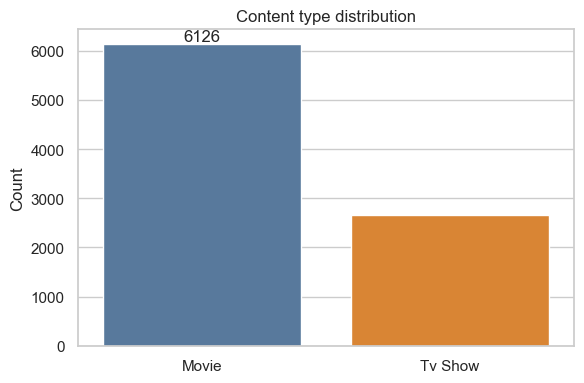

In [12]:
# Content composition
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.0)

# Type distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(data=netflix_data_clean, x="type", palette=["#4c78a8","#f58518"])
ax.bar_label(ax.containers[0])
plt.title("Content type distribution")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

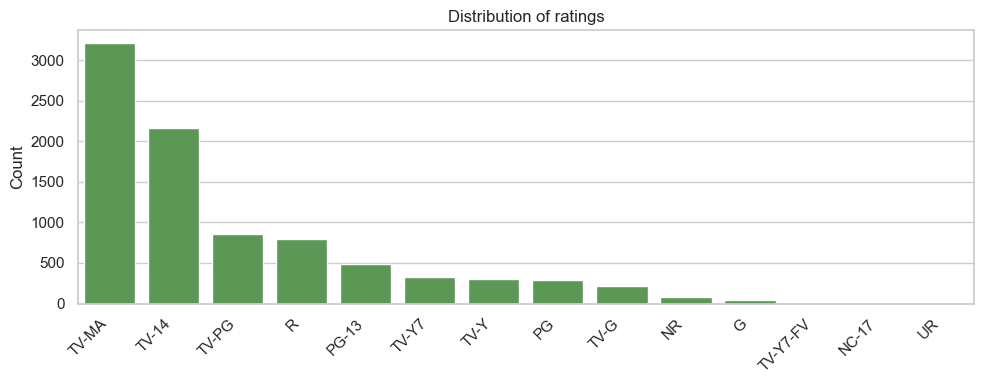

In [13]:
# Ratings distribution (top categories):
plt.figure(figsize=(10,4))
rating_order = netflix_data_clean["rating"].value_counts().index.tolist()
sns.countplot(data=netflix_data_clean, x="rating", order=rating_order, color="#54a24b")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of ratings")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

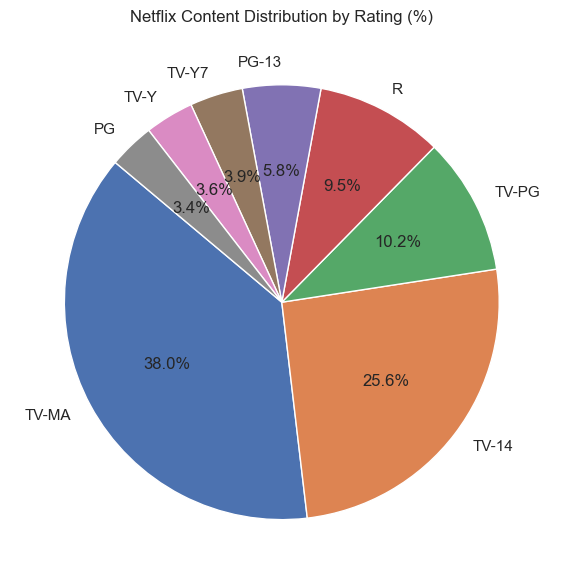

In [14]:
rating_counts = netflix_data_clean["rating"].value_counts().head(8)

plt.figure(figsize=(6,6))

plt.pie(
    rating_counts.values,
    labels=rating_counts.index,
    autopct="%.1f%%",
    startangle=140
)

plt.title("Netflix Content Distribution by Rating (%)")
plt.tight_layout()
plt.show()

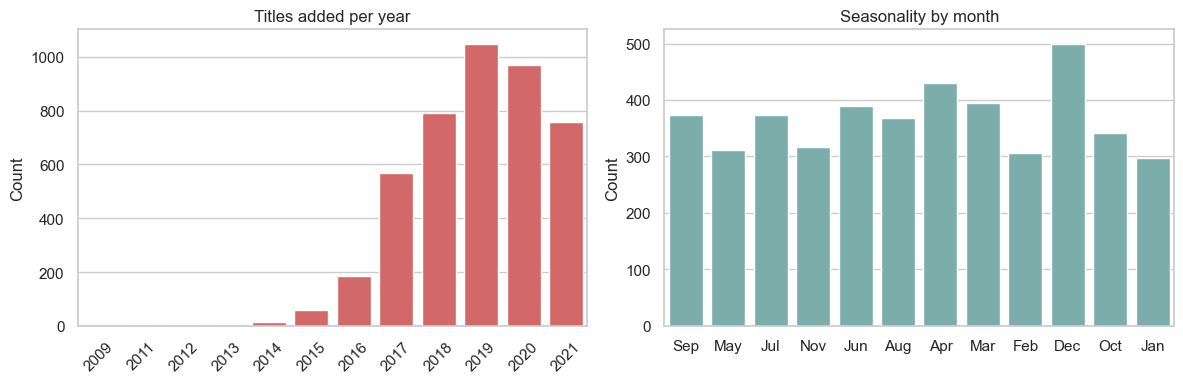

In [15]:
# Content added over time (year and month seasonality):
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.countplot(data=netflix_data_clean, x="year_added", ax=axes[0], color="#e45756")
axes[0].set_title("Titles added per year")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

month_map = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
netflix_data_clean["month_name"] = netflix_data_clean["month_added"].map(month_map)

sns.countplot(data=netflix_data_clean, x="month_name", ax=axes[1], color="#72b7b2")
axes[1].set_title("Seasonality by month")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show() 

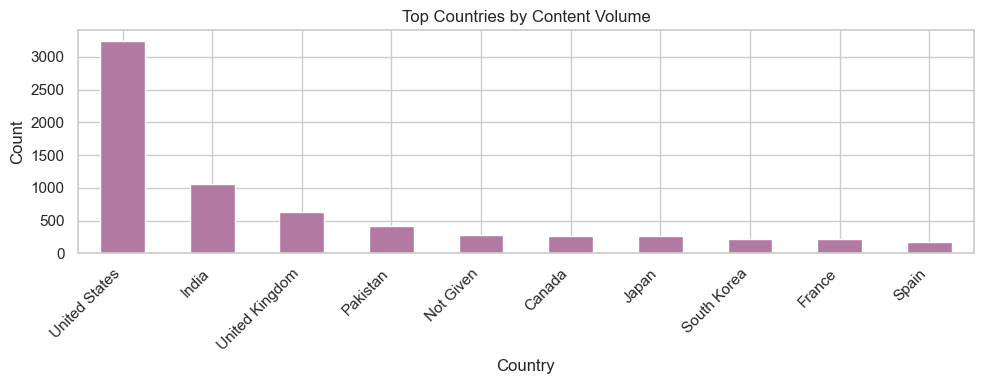

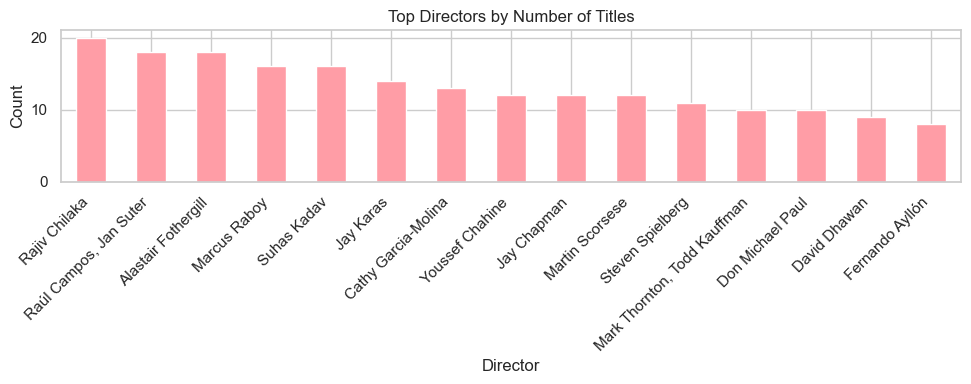

In [16]:
# Top countries and directors:

# Top 10 Countries by Content Count
# Get top 10 countries
top_countries = netflix_data_clean["country"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,4))
top_countries.plot(kind="bar", color="#b279a2")

plt.title("Top Countries by Content Volume")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Top 15 Directors by Number of Titles (excluding "Not Given")
# Filter out missing directors and get top 15
top_directors = netflix_data_clean[netflix_data_clean["director"] != "Not Given"]["director"].value_counts().head(15)

# Plot bar chart
plt.figure(figsize=(10,4))
top_directors.plot(kind="bar", color="#ff9da6")

plt.title("Top Directors by Number of Titles")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

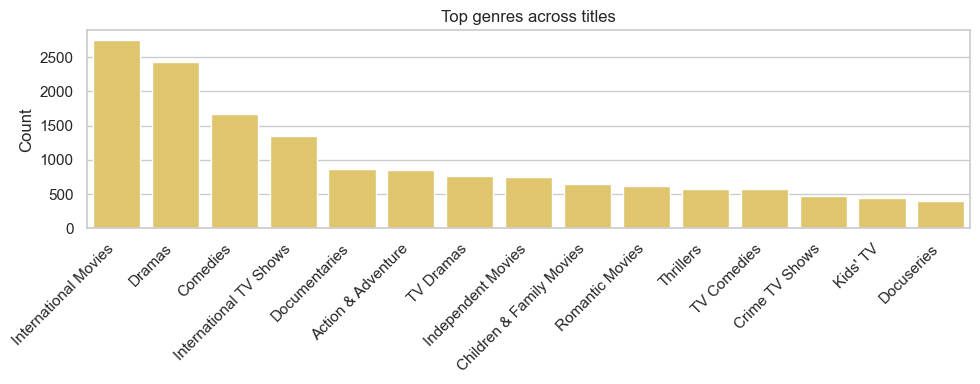

In [17]:
# Genre frequency (exploded):
genres = (netflix_data_clean[["show_id","genres_list"]].explode("genres_list").rename(columns={"genres_list":"genre"}))
genres["genre"] = genres["genre"].replace("", np.nan)
genres = genres.dropna(subset=["genre"])

top_genres = (genres["genre"].value_counts().head(15).rename_axis("genre").reset_index(name="count"))
plt.figure(figsize=(10,4))
sns.barplot(data=top_genres, x="genre", y="count", color="#f2cf5b")
plt.xticks(rotation=45, ha="right")
plt.title("Top genres across titles")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

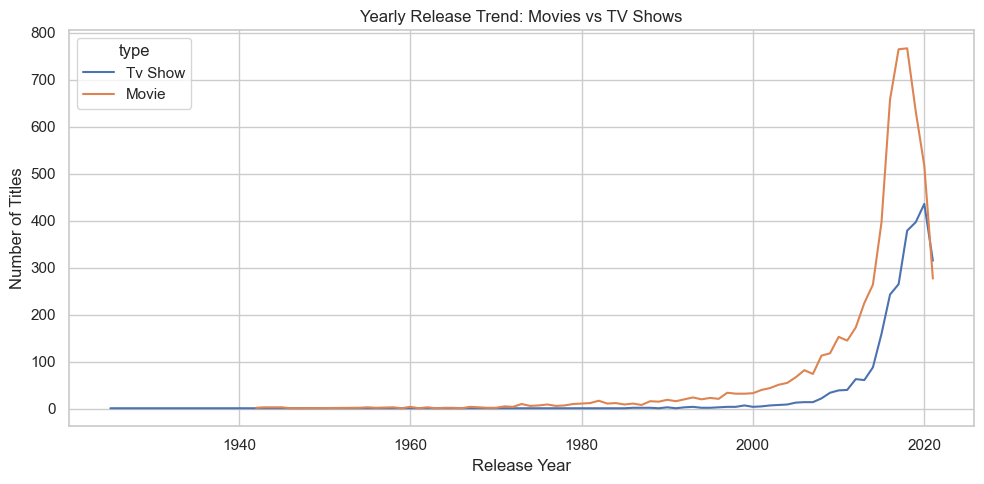

In [18]:
# Yearly release trend:
yearly_release = (netflix_data_clean.groupby(["release_year", "type"]).size().reset_index(name="count"))

plt.figure(figsize=(10,5))
sns.lineplot(
    data=yearly_release,
    x="release_year",
    y="count",
    hue="type")

plt.title("Yearly Release Trend: Movies vs TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

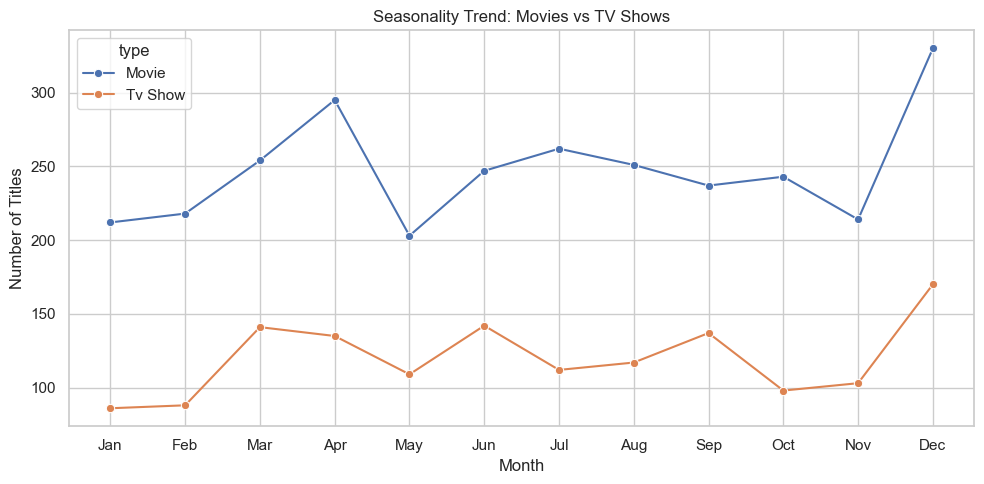

In [19]:
# month vs. type (seasonality trend)
monthly_type_counts = (netflix_data_clean.groupby(["month_added", "type"]).size().reset_index(name="count"))

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_type_counts,
    x="month_added",
    y="count",
    hue="type",
    marker="o"
)

plt.title("Seasonality Trend: Movies vs TV Shows")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.tight_layout()
plt.show()

## Upload cleaned data to MySQL:

In [21]:
import pandas as pd
from sqlalchemy import create_engine

username = "root"
password = "MysqlSunita80"
host = "localhost"
port= "3306"
database = "Netflix_Analytics"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

# Write main table 
cols = ["show_id","type","title","director","country","date_added", "release_year","rating","duration","movie_duration_min","tv_seasons","listed_in"] 
netflix_data_clean[cols].to_sql("titles", engine, if_exists="replace", index=False) 

# Write exploded genres table 
genres.to_sql("genres", engine, if_exists="replace", index=False)

19294

## Machine Learning: Classification models for type and ratings:

In [23]:
# Feature engineering:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Model 1: Binary classification (Movie vs TV Show)
# Select inputs (features) and output (target)
X = netflix_data_clean[["country","rating","release_year","duration","year_added","month_added"]]
netflix_data_clean["type"] = netflix_data_clean["type"].str.strip()
y_type = netflix_data_clean["type"].map({"Movie": 0, "Tv Show": 1})

num_cols = ["release_year", "movie_duration_min", "year_added", "month_added"]

netflix_data_clean[num_cols] = (
    netflix_data_clean[num_cols]
    .astype("float64")   # convert to pure numpy float
    .fillna(0)           # remove all NaNs
)

# Features (USE CORRECT COLUMN NAME)
X = netflix_data_clean[["country","rating","release_year","movie_duration_min","year_added","month_added"]]

categorical = ["country","rating"]
numeric = ["release_year","movie_duration_min","year_added","month_added"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_type,
    test_size=0.2,
    random_state=42,
    stratify=y_type
)

# Logistic Regression
logit_clf = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])
logit_clf.fit(X_train, y_train)

print("Logistic Regression:")
print(classification_report(y_test, logit_clf.predict(X_test)))

# Random Forest
rf_clf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])
rf_clf.fit(X_train, y_train)

print("Random Forest:")
print(classification_report(y_test, rf_clf.predict(X_test)))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [24]:
# Multi-class: rating prediction:
# Filter to common ratings to reduce label noise (e.g., top 6)
top_ratings = netflix_data_clean["rating"].value_counts().head(6).index.tolist()
df_rate = netflix_data_clean[netflix_data_clean["rating"].isin(top_ratings)].copy()

Xr = df_rate[["country","release_year","movie_duration_min","year_added","month_added","type"]]
yr = df_rate["rating"]

categorical_r = ["country","type"]
numeric_r = ["release_year","movie_duration_min","year_added","month_added"]

preprocess_r = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_r),
        ("num", "passthrough", numeric_r)
    ])

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42, stratify=yr)

# Gradient Boosting for multi-class
gb_clf = Pipeline(steps=[
    ("prep", preprocess_r),
    ("clf", GradientBoostingClassifier(random_state=42))
])
gb_clf.fit(Xr_train, yr_train)
print("Gradient Boosting (Rating):")
print(classification_report(yr_test, gb_clf.predict(Xr_test)))


Gradient Boosting (Rating):
              precision    recall  f1-score   support

       PG-13       0.40      0.32      0.35        98
           R       0.46      0.39      0.42       160
       TV-14       0.51      0.41      0.46       431
       TV-MA       0.53      0.80      0.64       641
       TV-PG       0.38      0.08      0.13       172
       TV-Y7       0.62      0.12      0.20        67

    accuracy                           0.51      1569
   macro avg       0.48      0.35      0.37      1569
weighted avg       0.50      0.51      0.48      1569



In [25]:
# Feature importance (Random Forest):
# Extract feature names post-encoding 
ohe = rf_clf.named_steps["prep"].named_transformers_["cat"] 
cat_features = ohe.get_feature_names_out(categorical).tolist() 
feature_names = cat_features + numeric 
importances = rf_clf.named_steps["clf"].feature_importances_ 
imp_df = (pd.DataFrame({"feature": feature_names, "importance": importances}) .sort_values("importance", ascending=False)) 
imp_df.head(15)

,feature,importance
94,movie_duration_min,0.809972
48,country_Pakistan,0.030018
93,release_year,0.026545
84,rating_R,0.018823
27,country_India,0.014417
62,country_South Korea,0.010421
83,rating_PG-13,0.010243
96,month_added,0.009588
33,country_Japan,0.007332
95,year_added,0.007287
